In [63]:
import pandas as pd

# Load the dataset
df = pd.read_csv('FIFA-21 Complete.csv', sep=';')

# Display the first few rows
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [64]:
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [65]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [46]:
# Check for missing values
df.isnull().sum()

,0
player_id,0
name,0
nationality,0
position,0
overall,0
age,0
hits,0
potential,0
team,0


In [47]:
# Summary statistics for numerical columns
df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


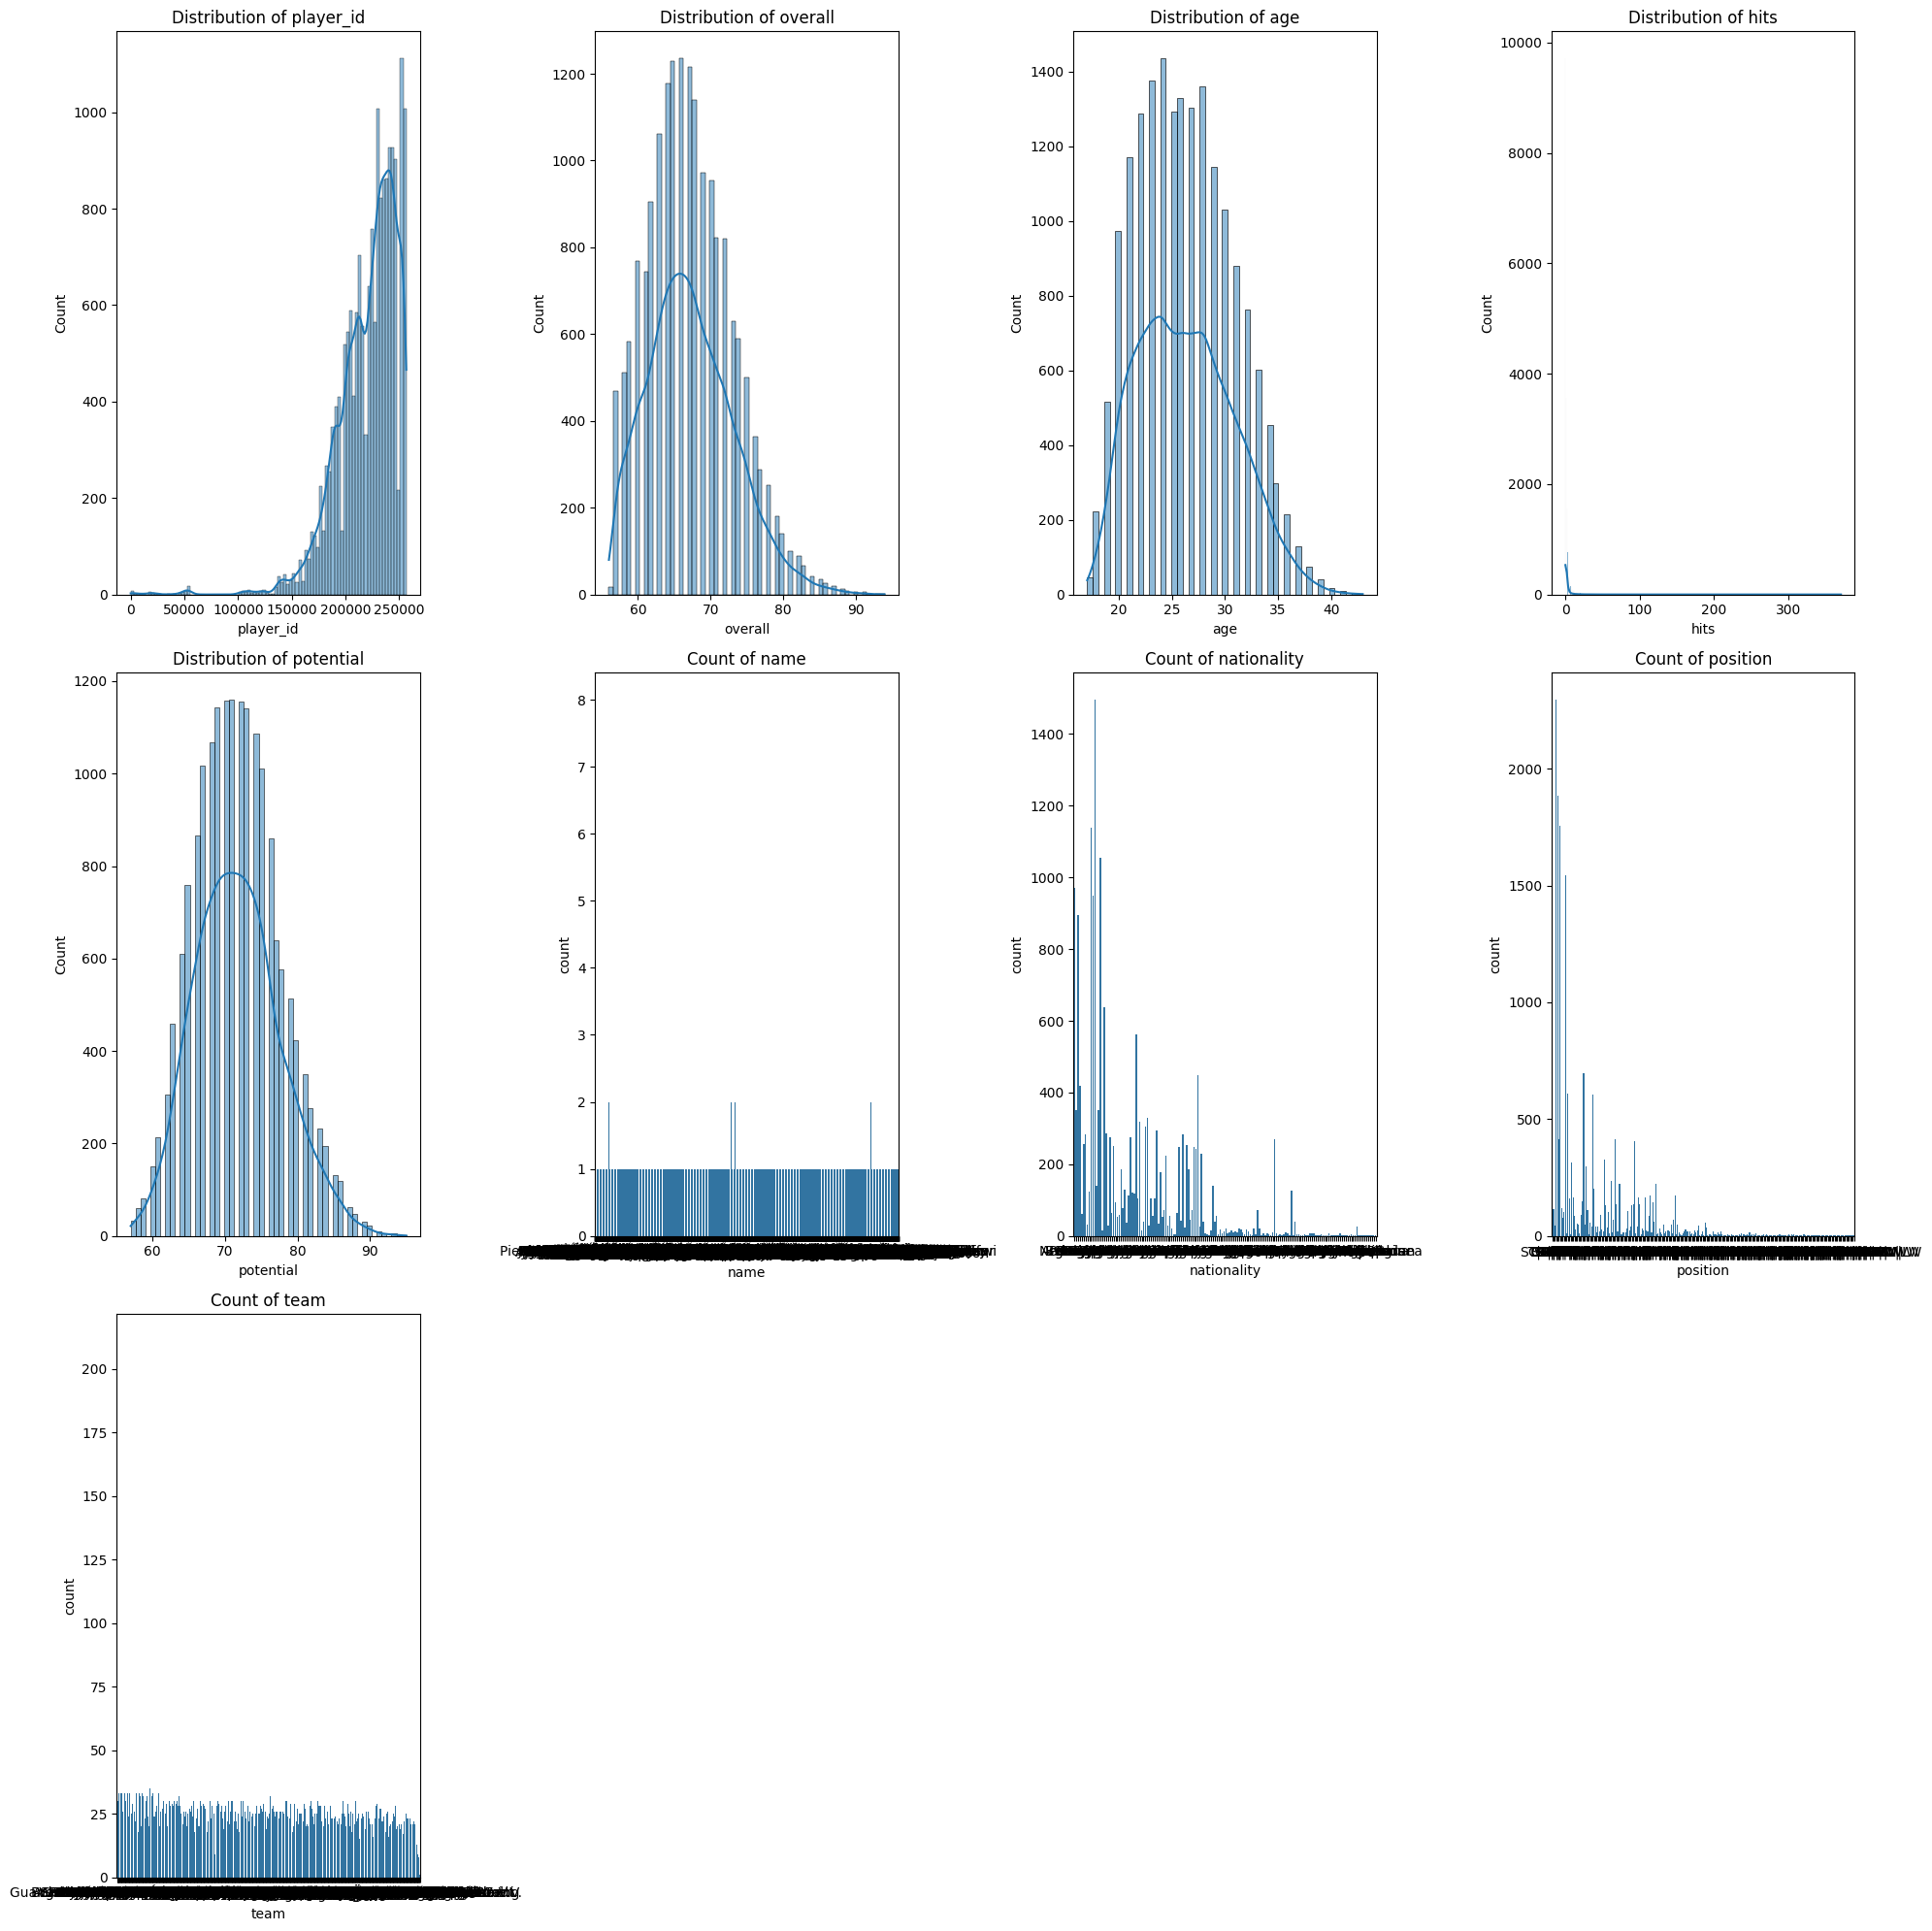

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot histograms for numerical columns
num_cols = ["player_id", "overall", "age", "hits", "potential"]
for i, col in enumerate(num_cols[:len(axes)]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Plot bar charts for categorical columns
cat_cols = ["name", "nationality", "position", "team"]
for i, col in enumerate(cat_cols):
    if i < len(axes) - len(num_cols):
        sns.countplot(x=df[col], ax=axes[len(num_cols) + i])
        axes[len(num_cols) + i].set_title(f'Count of {col}')

# Remove empty subplots
for i in range(len(num_cols) + len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [69]:
# Stats Report
summary_stats = df[num_cols].describe().loc[['min', 'max', 'mean', '50%']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
print(summary_stats)

# Check for outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

            player_id    overall       age       hits  potential
min         41.000000  56.000000  17.00000    0.00000  57.000000
max     256469.000000  94.000000  43.00000  371.00000  95.000000
mean    220912.660531  67.274345  26.31144    2.68945  71.738057
median  226753.000000  67.000000  26.00000    0.00000  71.000000
Outliers in player_id: 293
Outliers in overall: 156
Outliers in age: 15
Outliers in hits: 1617
Outliers in potential: 45


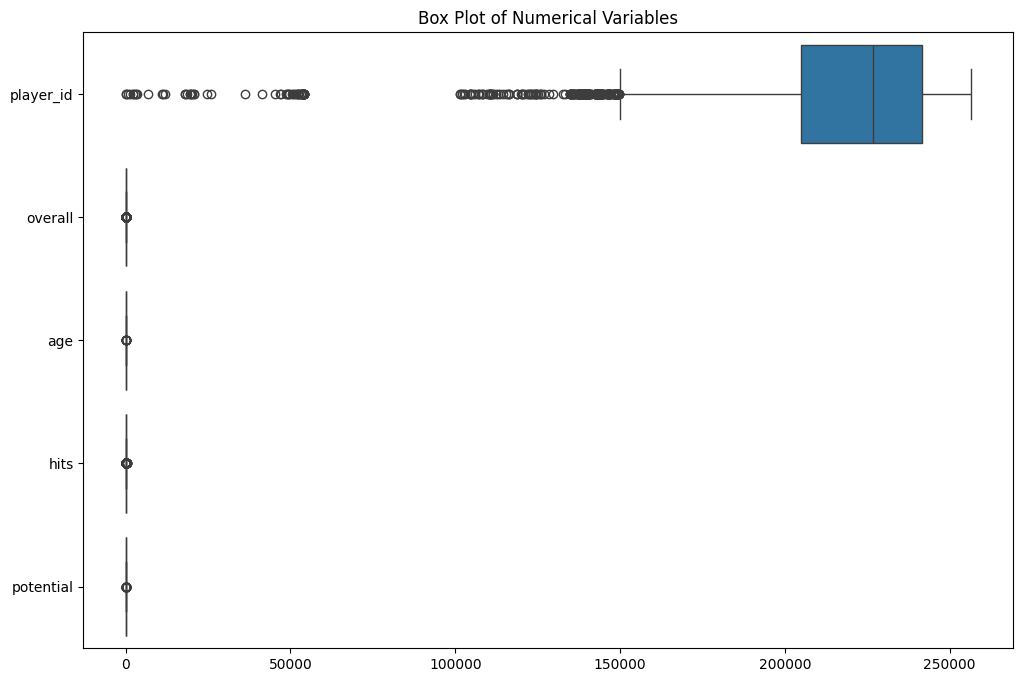

In [53]:
# Box plot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Box Plot of Numerical Variables')
plt.show()

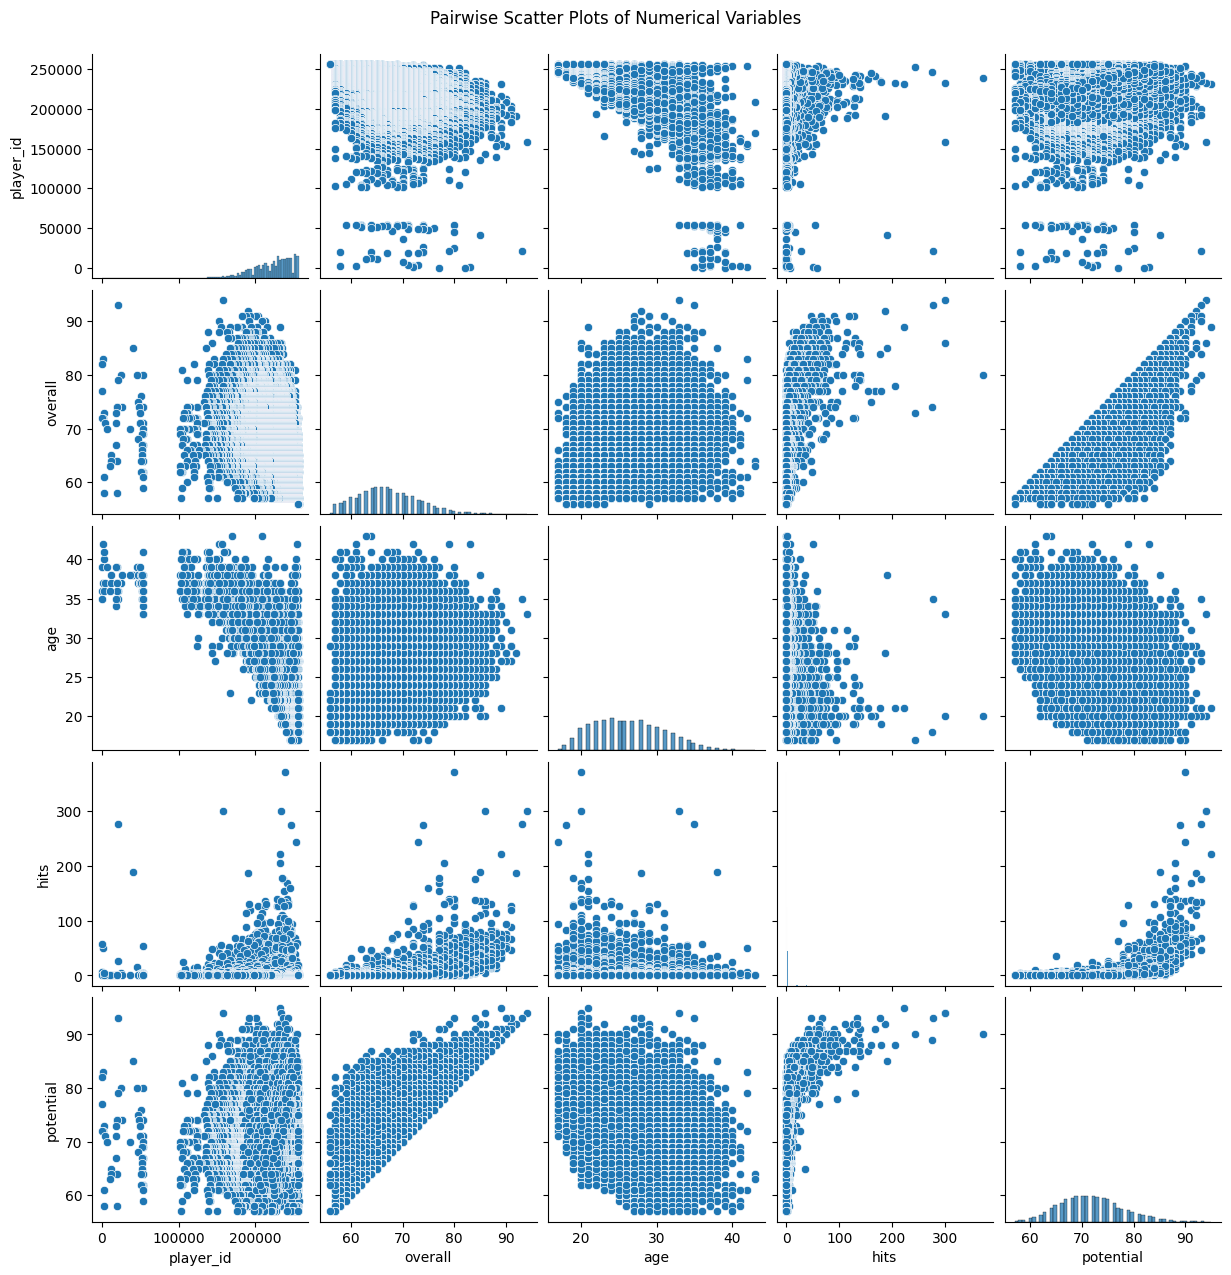

In [54]:
# Scatter plot matrix for numerical columns
sns.pairplot(df[num_cols])
plt.suptitle('Pairwise Scatter Plots of Numerical Variables', y=1.02)
plt.show()

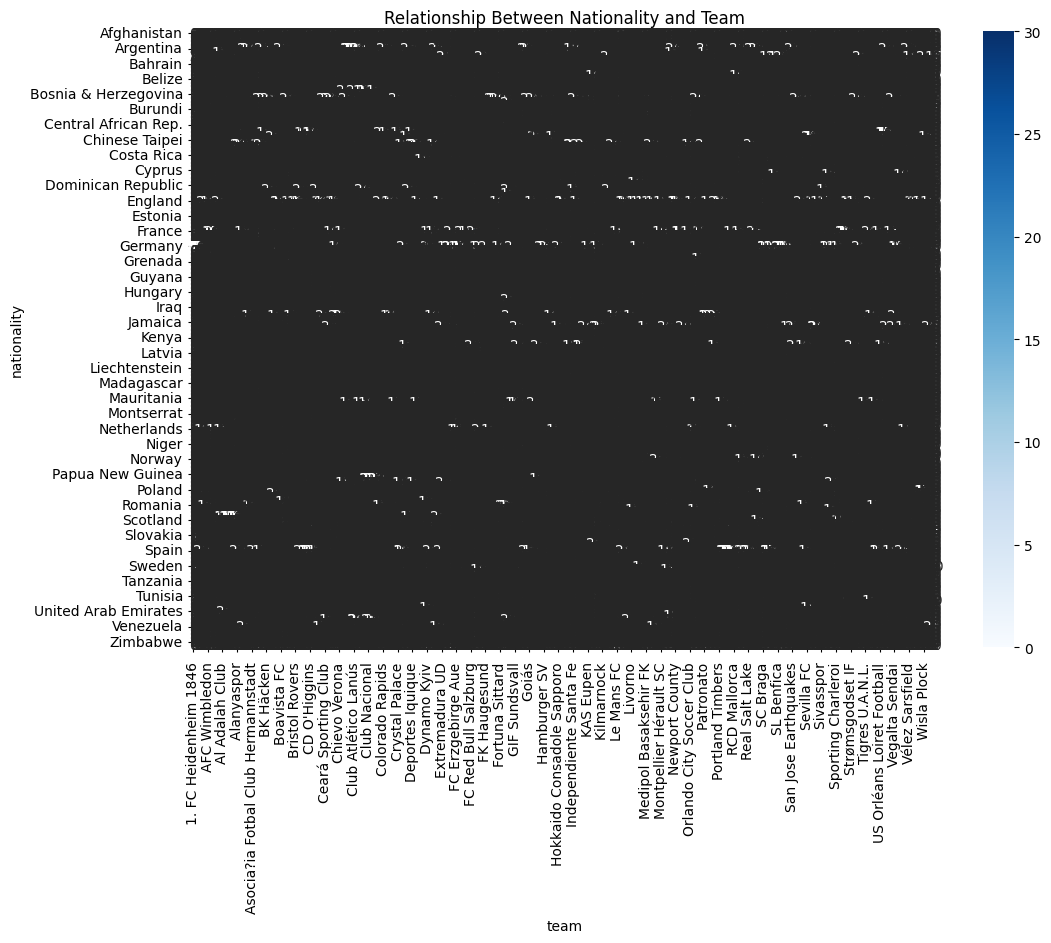

In [55]:
# Cross-tabulation of categorical variables
cross_tab = pd.crosstab(df['nationality'], df['team'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship Between Nationality and Team')
plt.show()

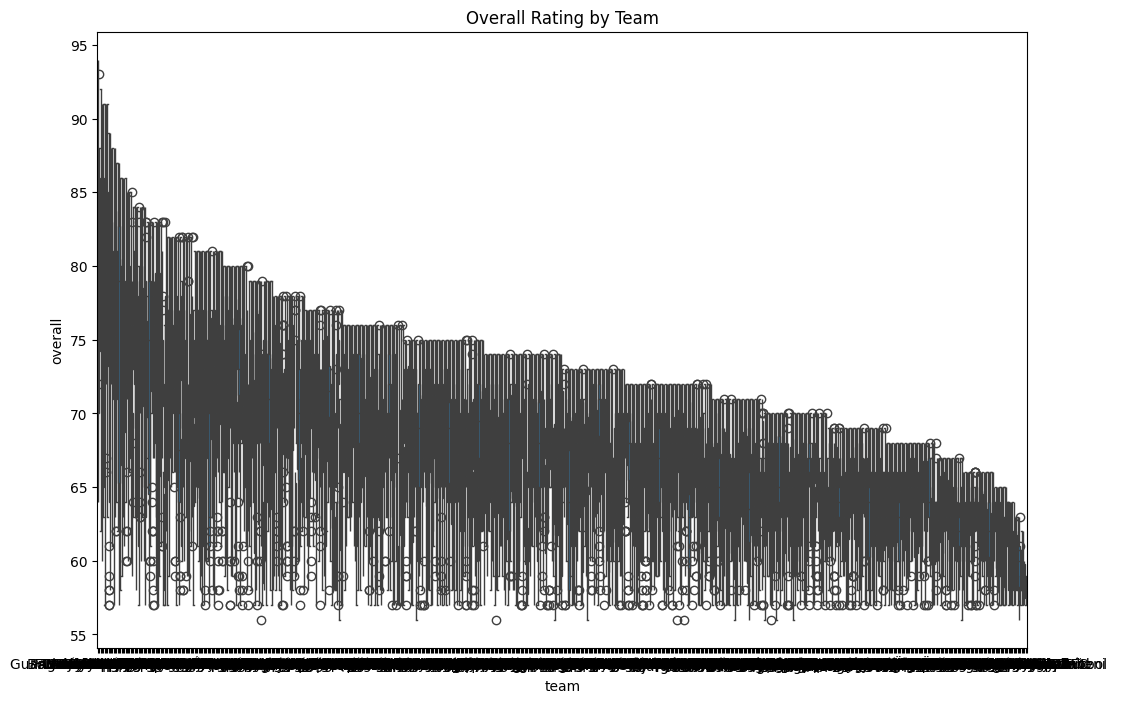

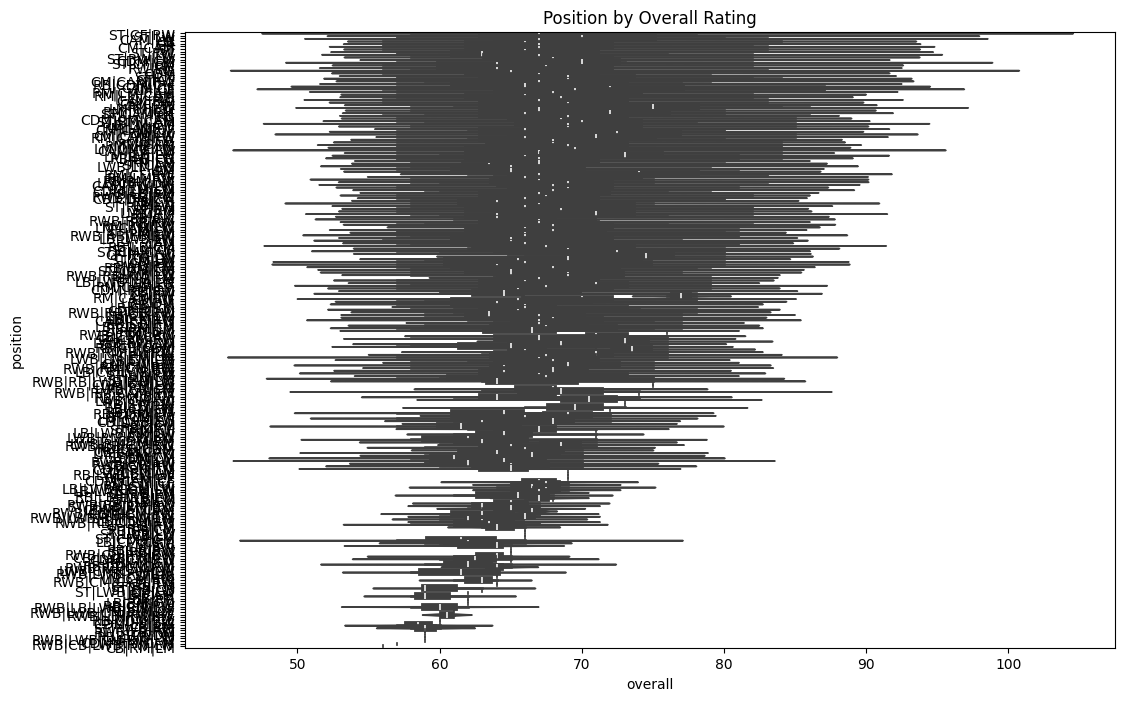

In [58]:
# Box plot for numerical variables grouped by categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='team', y='overall', data=df)
plt.title('Overall Rating by Team')
plt.show()

# Violin plot for numerical variables grouped by categorical variables
plt.figure(figsize=(12, 8))
sns.violinplot(x='overall', y='position', data=df)
plt.title('Position by Overall Rating')
plt.show()